In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
print(data_dir)
data_dir = pathlib.Path(data_dir).with_suffix('')
print(data_dir)

228813984/228813984 [==============================] - 1s 0us/step
/root/.keras/datasets/flower_photos.tar
/root/.keras/datasets/flower_photos


In [4]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [5]:
print(list(data_dir.glob('*/*.jpg')))

[PosixPath('/root/.keras/datasets/flower_photos/tulips/7481215720_73e40f178f_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/434146736_310a42d9cb_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/8520482921_21dd204ebd_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/8838983024_5c1a767878_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/3002863623_cd83d6e634.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/4681062529_36186617d9.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/113291410_1bdc718ed8_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/14090546015_504c8becd1.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/8712266605_3787e346cd_n.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/2294116183_a30d2aa2c1_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/8668973377_c69527db42_m.jpg'), PosixPath('/root/.keras/datasets/flower_photos/tulips/5687705933_55a8c2

In [6]:
import cv2

In [7]:
img=cv2.imread('/root/.keras/datasets/flower_photos/dandelion/9472854850_fc9e1db673.jpg')

In [8]:
print(img.shape)

(327, 500, 3)


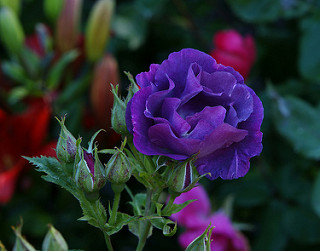

In [9]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

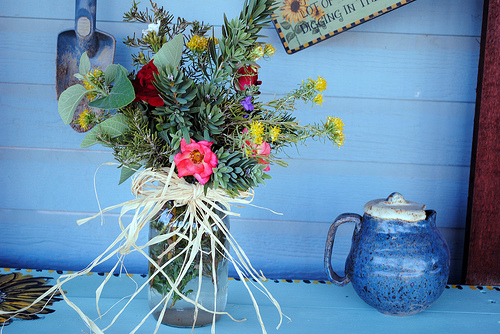

In [10]:
PIL.Image.open(str(roses[2]))

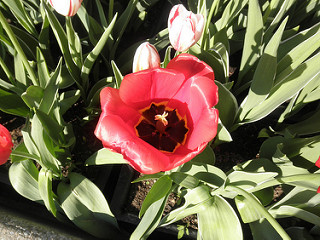

In [11]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

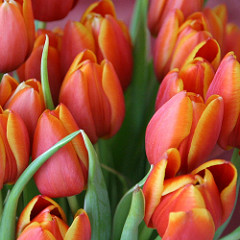

In [12]:
PIL.Image.open(str(tulips[1]))

In [13]:
batch_size=32
img_height=224
img_width=224


In [14]:
#updating the batch & width size - training dataset
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,
    subset="training",
    seed=123, #the same set of images always go into the training, test, validation set.
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [15]:
#validation
val_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,validation_split=0.2,
    subset="validation",
    seed=123, #the same set of images always go into the training, test, validation set.
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [17]:
class_name1=val_ds.class_names
print(class_name1)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


in deep learning the diretory is the label name for the entities

visualisation

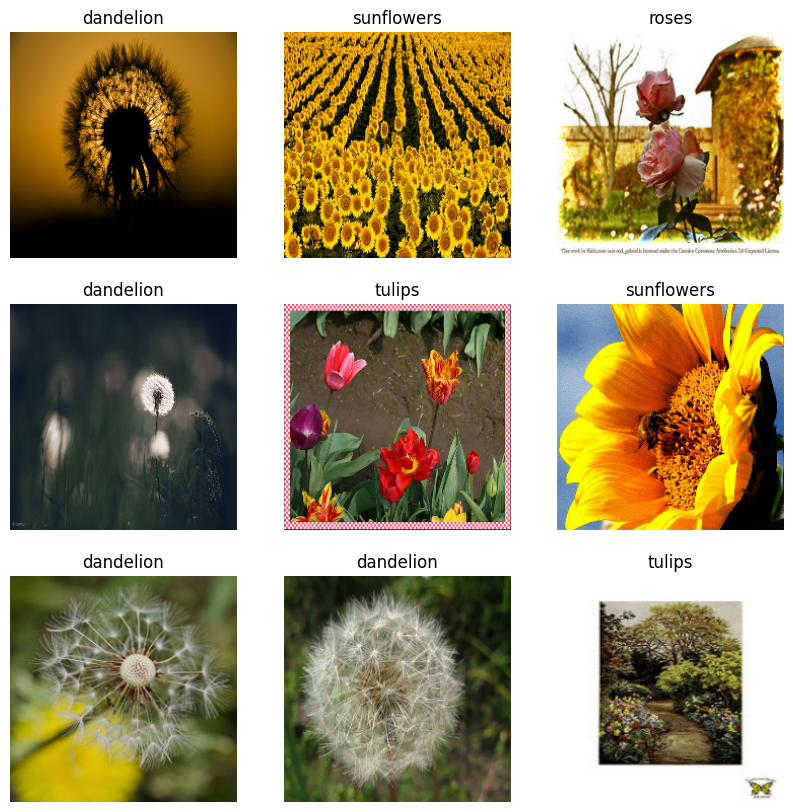

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10)) #image size
for images, labels in train_ds.take(10): #it will take 10 images ata random from taining dataset #labels=directory_name
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i] .numpy().astype("uint32"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
#cheching the batch_size of training dataset
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


32-batch size, 180-img height, 180-img width, 3-RGB(color image)
32-label size

In [20]:
normalization_layer = layers.Rescaling(1./255) #255 is constant pixel value

In [21]:
print(normalization_layer)

In [22]:
num_classes=print(len(class_names))

5


In [23]:
#model create
num_classes = len(class_names)
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #input layer includes normalisation, ,sizes, color indication
    layers.Conv2D(16, 3, padding='same', activation='relu'), #convolution layer    #16 - no. of filters,  3 - 3X3 filter size
    layers.MaxPooling2D(), #pooling layer
    layers.Conv2D(32, 3, padding='same', activation='relu'), #convolution layer    #32 - no. of filters,  3 - 3X3 filter size
    layers.MaxPooling2D(), #pooling layer   #it is "2D" based on the dimention of the input image    #"1D" Pooling-text,  #"3D" pooling-3D images
    layers.Conv2D(64, 3, padding='same', activation='relu'), #convolution layer    #64 - no. of filters,  3 - 3X3 filter size
    layers.MaxPooling2D(), #pooling layer
    layers.Flatten(), #converting the data into single-vector
    layers.Dense(128, activation='relu'), #hidden layer1 with 128 neurons
    layers.Dense(256, activation='relu'), #hidden layer2 with 256 neurons
    layers.Dense(num_classes) #output layer  #num_classes gives me how many output layer i want.  i.,e = 5 .
])

In [24]:
#model compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #categorical clasification
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [26]:
#model fit
epochs=10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs) #the parameter that the model gives is been stored in "history"

Epoch 1/10
92/92 [==============================] - 24s 95ms/step - loss: 1.4115 - accuracy: 0.3828 - val_loss: 1.1203 - val_accuracy: 0.4973
Epoch 2/10
92/92 [==============================] - 8s 88ms/step - loss: 1.0586 - accuracy: 0.5705 - val_loss: 0.9929 - val_accuracy: 0.6131
Epoch 3/10
92/92 [==============================] - 8s 77ms/step - loss: 0.8683 - accuracy: 0.6679 - val_loss: 0.9788 - val_accuracy: 0.6199
Epoch 4/10
92/92 [==============================] - 8s 83ms/step - loss: 0.6615 - accuracy: 0.7463 - val_loss: 1.0062 - val_accuracy: 0.6335
Epoch 5/10
92/92 [==============================] - 8s 87ms/step - loss: 0.4040 - accuracy: 0.8515 - val_loss: 1.1876 - val_accuracy: 0.6253
Epoch 6/10
92/92 [==============================] - 7s 76ms/step - loss: 0.2421 - accuracy: 0.9193 - val_loss: 1.4079 - val_accuracy: 0.6458
Epoch 7/10
92/92 [==============================] - 9s 89ms/step - loss: 0.1518 - accuracy: 0.9527 - val_loss: 1.6508 - val_accuracy: 0.6294
Epoch 8/10
9

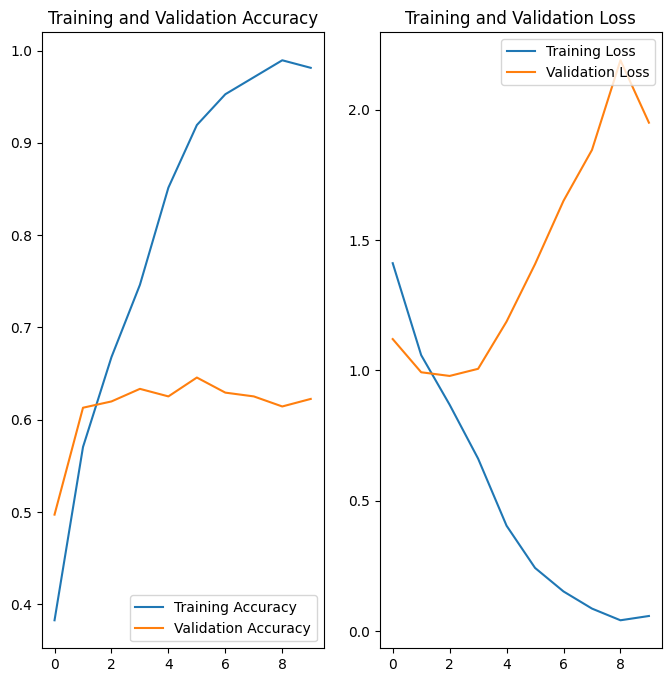

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

if the lines of the graph are parallel to eachother, the model is good
if the lines of the graph are intersecting to eachother at any point, the model is overfitting

In [28]:
#model 2 with dropout layer
model2 = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'), #convolution layer    #16 - no. of filters,  3 - 3X3 filter size
    layers.MaxPooling2D(), #pooling layer
    layers.Conv2D(32, 3, padding='same', activation='relu'), #convolution layer    #32 - no. of filters,  3 - 3X3 filter size
    layers.MaxPooling2D(), #pooling layer   #it is "2D" based on the dimention of the input image    #"1D" Pooling-text,  #"3D" pooling-3D images
    layers.Conv2D(64, 3, padding='same', activation='relu'), #convolution layer    #64 - no. of filters,  3 - 3X3 filter size
    layers.MaxPooling2D(), #pooling layer
    layers.Dropout(0.2), #dropout Layer
    layers.Flatten(), #converting the data into single-vector
    layers.Dense(128, activation='relu'), #hidden layer1 with 128 neurons
    layers.Dense(num_classes, name="outputs") #output layer  #num_classes gives me how many output layer i want.  i.,e = 5 .
])

In [29]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #categorical clasification
              metrics=['accuracy'])

In [30]:
epochs = 10
history1 = model2.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
92/92 [==============================] - 11s 95ms/step - loss: 1.4304 - accuracy: 0.4040 - val_loss: 1.1598 - val_accuracy: 0.5422
Epoch 2/10
92/92 [==============================] - 9s 89ms/step - loss: 1.0035 - accuracy: 0.6039 - val_loss: 0.9844 - val_accuracy: 0.6076
Epoch 3/10
92/92 [==============================] - 9s 90ms/step - loss: 0.8185 - accuracy: 0.6863 - val_loss: 0.9702 - val_accuracy: 0.6240
Epoch 4/10
92/92 [==============================] - 9s 90ms/step - loss: 0.6120 - accuracy: 0.7725 - val_loss: 0.9827 - val_accuracy: 0.6349
Epoch 5/10
92/92 [==============================] - 8s 83ms/step - loss: 0.3983 - accuracy: 0.8658 - val_loss: 1.1781 - val_accuracy: 0.6417
Epoch 6/10
92/92 [==============================] - 9s 84ms/step - loss: 0.2474 - accuracy: 0.9230 - val_loss: 1.2839 - val_accuracy: 0.6172
Epoch 7/10
92/92 [==============================] - 9s 91ms/step - loss: 0.1355 - accuracy: 0.9588 - val_loss: 1.5018 - val_accuracy: 0.6172
Epoch 8/10
9

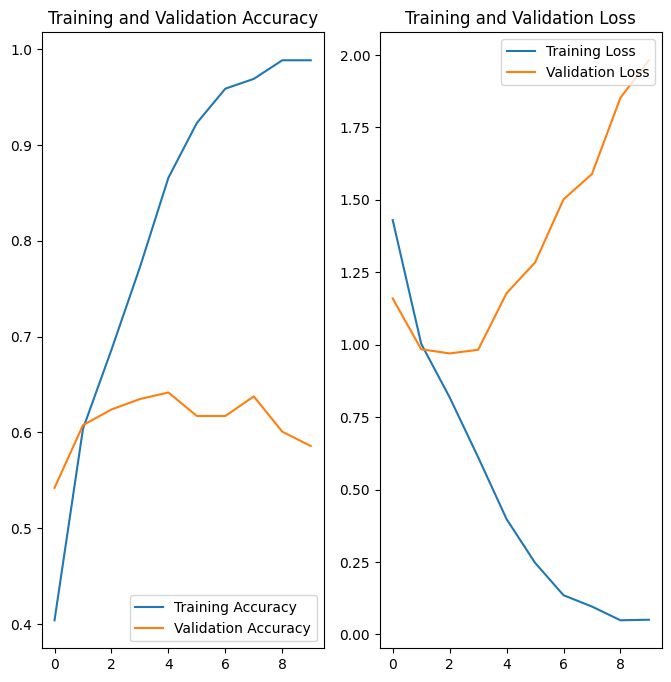

In [31]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

30.5.23

IMAGE AGUMENTATION:
generally performed on the training set only

In [32]:
data_agumentation=keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

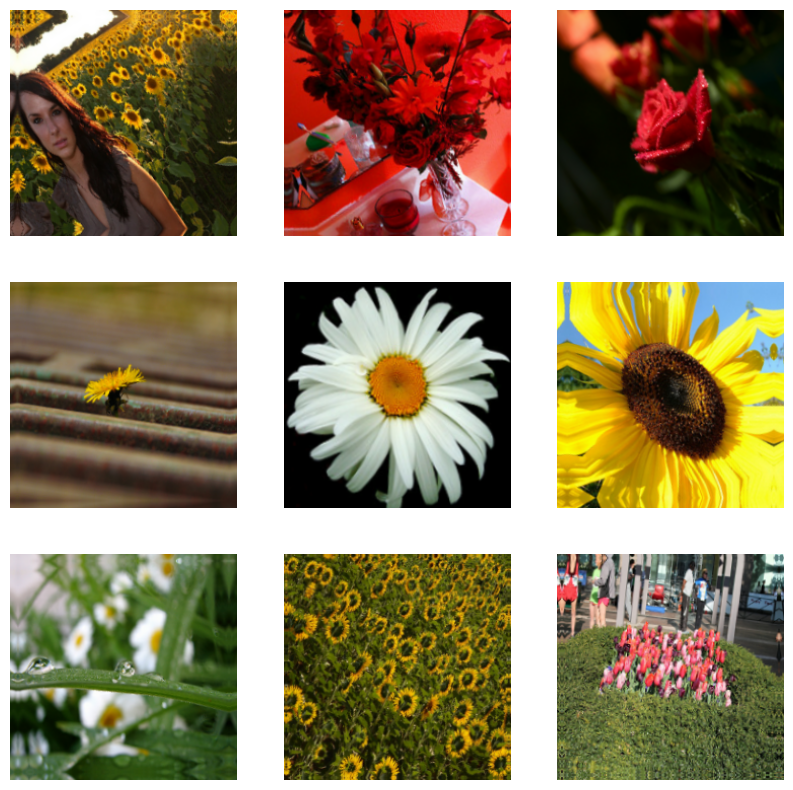

In [33]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    agumented_images=data_agumentation(images)
    ax=plt.subplot(3,3,i+1)
    plt.imshow(agumented_images[i].numpy().astype("uint8"))
    plt.axis('off')


In [34]:
model22 = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'), #convolution layer    #16 - no. of filters,  3 - 3X3 filter size
    layers.MaxPooling2D(), #pooling layer
    layers.Conv2D(32, 3, padding='same', activation='relu'), #convolution layer    #32 - no. of filters,  3 - 3X3 filter size
    layers.MaxPooling2D(), #pooling layer   #it is "2D" based on the dimention of the input image    #"1D" Pooling-text,  #"3D" pooling-3D images
    layers.Conv2D(64, 3, padding='same', activation='relu'), #convolution layer    #64 - no. of filters,  3 - 3X3 filter size
    layers.MaxPooling2D(), #pooling layer
    layers.Dropout(0.2), #dropout Layer
    layers.Flatten(), #converting the data into single-vector
    layers.Dense(128, activation='relu'), #hidden layer1 with 128 neurons
    layers.Dense(num_classes, name="outputs")])

In [35]:
model22.compile(optimizer='adam',

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])


In [36]:
epochs = 15
history33 = model22.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 11s 81ms/step - loss: 1.4973 - accuracy: 0.3641 - val_loss: 1.2230 - val_accuracy: 0.4905
Epoch 2/15
92/92 [==============================] - 9s 90ms/step - loss: 1.0474 - accuracy: 0.5916 - val_loss: 0.9782 - val_accuracy: 0.6458
Epoch 3/15
92/92 [==============================] - 9s 89ms/step - loss: 0.8103 - accuracy: 0.6975 - val_loss: 0.9462 - val_accuracy: 0.6362
Epoch 4/15
92/92 [==============================] - 8s 79ms/step - loss: 0.5838 - accuracy: 0.7854 - val_loss: 1.1097 - val_accuracy: 0.6349
Epoch 5/15
92/92 [==============================] - 9s 90ms/step - loss: 0.3378 - accuracy: 0.8787 - val_loss: 1.2273 - val_accuracy: 0.6335
Epoch 6/15
92/92 [==============================] - 9s 90ms/step - loss: 0.1869 - accuracy: 0.9428 - val_loss: 1.4836 - val_accuracy: 0.6417
Epoch 7/15
92/92 [==============================] - 8s 86ms/step - loss: 0.1225 - accuracy: 0.9622 - val_loss: 1.6082 - val_accuracy: 0.6253
Epoch 8/15
9

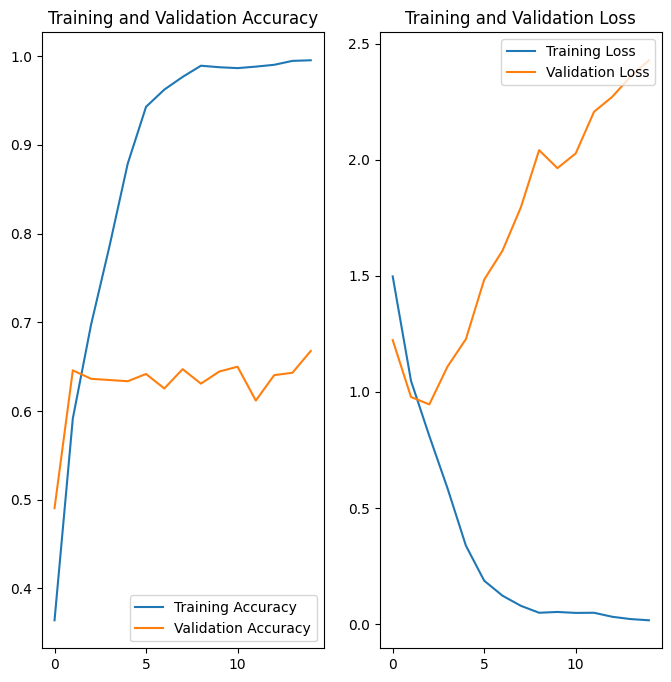

In [37]:
acc = history33.history['accuracy']
val_acc = history33.history['val_accuracy']
loss = history33.history['loss']
val_loss = history33.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()